In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
import pandas as pd

# Load Titanic dataset
df = pd.read_csv("train.csv")

# Preview first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Download the Titanic dataset
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv -O train.csv

--2025-08-21 03:29:16--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-08-21 03:29:16 (3.93 MB/s) - ‘train.csv’ saved [60302/60302]



In [13]:
# Check missing values
df.isnull().sum()

# Find columns with >50% missing
threshold = 0.5 * len(df)
drop_cols = df.columns[df.isnull().sum() > threshold]

print("Columns to drop:", drop_cols.tolist())

# Drop them
df.drop(columns=drop_cols, inplace=True)

#Input missing values
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

#Remove Duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"Removed {before - after} duplicate rows.")

Columns to drop: ['Cabin']
Removed 0 duplicate rows.


/tmp/ipython-input-28641024.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-28641024.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [14]:
# Check missing values
df.isnull().sum()

# Find columns with >50% missing
threshold = 0.5 * len(df)
drop_cols = df.columns[df.isnull().sum() > threshold]

print("Columns to drop:", drop_cols.tolist())

# Drop them
df.drop(columns=drop_cols, inplace=True)

#Input missing values
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

#Remove Duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"Removed {before - after} duplicate rows.")

Columns to drop: []
Removed 0 duplicate rows.


/tmp/ipython-input-28641024.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-28641024.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [15]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Gender_submission shape:", gender.shape)


Train shape: (891, 12)
Test shape: (418, 11)
Gender_submission shape: (418, 2)


In [16]:
# 📌 Task 2: Data Cleaning for Titanic (train & test)

import pandas as pd

# Load datasets (make sure you have uploaded train.csv and test.csv)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Initial Shapes:")
print("Train:", train.shape)
print("Test:", test.shape)

# 🔹 Step 2.1: Check missing values before cleaning
print("\nMissing values in Train (before cleaning):")
print(train.isnull().sum())

print("\nMissing values in Test (before cleaning):")
print(test.isnull().sum())

# 🔹 Step 2.2: Drop columns with >50% missing
def drop_high_missing(df):
    threshold = 0.5 * len(df)
    drop_cols = df.columns[df.isnull().sum() > threshold]
    print("Dropping columns:", drop_cols.tolist())
    return df.drop(columns=drop_cols)

train = drop_high_missing(train)
test = drop_high_missing(test)

# 🔹 Step 2.3: Fill missing values
def impute_missing(df):
    for col in df.columns:
        if df[col].dtype in ["int64", "float64"]:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

train = impute_missing(train)
test = impute_missing(test)

# 🔹 Step 2.4: Remove duplicates
before_train = train.shape[0]
before_test = test.shape[0]

train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

print(f"\nRemoved {before_train - train.shape[0]} duplicates from Train")
print(f"Removed {before_test - test.shape[0]} duplicates from Test")

# 🔹 Step 2.5: Final shapes and missing check
print("\nFinal Shapes:")
print("Train:", train.shape)
print("Test:", test.shape)

print("\nMissing values in Train (after cleaning):")
print(train.isnull().sum())

print("\nMissing values in Test (after cleaning):")
print(test.isnull().sum())


Initial Shapes:
Train: (891, 12)
Test: (418, 11)

Missing values in Train (before cleaning):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in Test (before cleaning):
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Dropping columns: ['Cabin']
Dropping columns: ['Cabin']

Removed 0 duplicates from Train
Removed 0 duplicates from Test

Final Shapes:
Train: (891, 11)
Test: (418, 10)

Missing values in Train (after cleaning):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dty

In [17]:
# 📌 Task 3: Data Transformation for Titanic (train & test)

import pandas as pd

# Load the already cleaned datasets (from Task 2)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# ------------------------------
# 🔹 Step 3.1: One-Hot Encoding
# ------------------------------
categorical_cols = ["Sex", "Pclass", "Embarked"]

train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

# Align columns between train and test (ensure same structure)
train, test = train.align(test, join="left", axis=1, fill_value=0)

# ------------------------------
# 🔹 Step 3.2: Convert Boolean to 0/1
# ------------------------------
for col in train.columns:
    if train[col].dtype == "bool":
        train[col] = train[col].astype(int)

for col in test.columns:
    if test[col].dtype == "bool":
        test[col] = test[col].astype(int)

# ------------------------------
# 🔹 Step 3.3: Verify Results
# ------------------------------
print("✅ Data Transformation Completed!")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nTransformed Train Columns:")
print(train.columns.tolist())

print("\nSample Transformed Train Data:")
print(train.head())

# ------------------------------
# 🔹 Step 3.4: Save transformed datasets (optional for next tasks)
# ------------------------------
train.to_csv("train_transformed.csv", index=False)
test.to_csv("test_transformed.csv", index=False)
print("\nSaved: train_transformed.csv & test_transformed.csv")


✅ Data Transformation Completed!
Train shape: (891, 14)
Test shape: (418, 14)

Transformed Train Columns:
['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S']

Sample Transformed Train Data:
   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  Sex_male  Pclass_2  \
0  22.0      1      0         A/5 21171   7.2500   NaN         1         0   
1  38.0      1      0          PC 17599  71.2833   C85         0         0   
2

In [18]:
# 📌 Task 4: Convert categorical and boolean features to numeric

import pandas as pd

# Load cleaned train and test (from Task 2)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# ------------------------------
# 🔹 Step 4.1: One-Hot Encoding for Categorical Features
# ------------------------------
categorical_cols = ["Sex", "Embarked", "Pclass"]

train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

# Align train & test (same columns after encoding)
train, test = train.align(test, join="left", axis=1, fill_value=0)

# ------------------------------
# 🔹 Step 4.2: Convert Boolean Columns (alone, who, etc.)
# ------------------------------
for col in train.columns:
    if train[col].dtype == "bool":
        train[col] = train[col].astype(int)

for col in test.columns:
    if test[col].dtype == "bool":
        test[col] = test[col].astype(int)

# ------------------------------
# 🔹 Step 4.3: Verify Results
# ------------------------------
print("✅ Conversion Completed!")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nTrain Columns After Conversion:")
print(train.columns.tolist())

print("\nSample Transformed Train Data:")
print(train.head())

# ------------------------------
# 🔹 Step 4.4: Save Transformed Datasets
# ------------------------------
train.to_csv("train_task4_converted.csv", index=False)
test.to_csv("test_task4_converted.csv", index=False)
print("\nSaved: train_task4_converted.csv & test_task4_converted.csv")


✅ Conversion Completed!
Train shape: (891, 14)
Test shape: (418, 14)

Train Columns After Conversion:
['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']

Sample Transformed Train Data:
   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  Sex_male  Embarked_Q  \
0  22.0      1      0         A/5 21171   7.2500   NaN         1           0   
1  38.0      1      0          PC 17599  71.2833   C85         0           0   

In [19]:
# 📌 Task 5: Feature Scaling (Normalize & Standardize)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load datasets from Task 4 (converted categorical/boolean)
train = pd.read_csv("train_task4_converted.csv")
test = pd.read_csv("test_task4_converted.csv")

# ------------------------------
# 🔹 Step 5.1: Select Numerical Columns
# ------------------------------
numeric_cols = ["Age", "Fare"]   # Key continuous features

print("Numerical columns to scale:", numeric_cols)

# ------------------------------
# 🔹 Step 5.2: Min-Max Scaling (Normalization)
# ------------------------------
scaler_minmax = MinMaxScaler()
train_minmax = train.copy()
test_minmax = test.copy()

train_minmax[numeric_cols] = scaler_minmax.fit_transform(train[numeric_cols])
test_minmax[numeric_cols] = scaler_minmax.transform(test[numeric_cols])

# ------------------------------
# 🔹 Step 5.3: Standard Scaling (Z-Score)
# ------------------------------
scaler_standard = StandardScaler()
train_standard = train.copy()
test_standard = test.copy()

train_standard[numeric_cols] = scaler_standard.fit_transform(train[numeric_cols])
test_standard[numeric_cols] = scaler_standard.transform(test[numeric_cols])

# ------------------------------
# 🔹 Step 5.4: Compare Results
# ------------------------------
print("\n✅ Min-Max Scaled Train Data (first 5 rows):")
print(train_minmax[numeric_cols].head())

print("\n✅ Standard Scaled Train Data (first 5 rows):")
print(train_standard[numeric_cols].head())

# ------------------------------
# 🔹 Step 5.5: Save Scaled Datasets
# ------------------------------
train_minmax.to_csv("train_task5_minmax.csv", index=False)
test_minmax.to_csv("test_task5_minmax.csv", index=False)

train_standard.to_csv("train_task5_standard.csv", index=False)
test_standard.to_csv("test_task5_standard.csv", index=False)

print("\nSaved: MinMax & Standard scaled versions of train/test CSVs")


Numerical columns to scale: ['Age', 'Fare']

✅ Min-Max Scaled Train Data (first 5 rows):
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713

✅ Standard Scaled Train Data (first 5 rows):
        Age      Fare
0 -0.530377 -0.502445
1  0.571831  0.786845
2 -0.254825 -0.488854
3  0.365167  0.420730
4  0.365167 -0.486337

Saved: MinMax & Standard scaled versions of train/test CSVs


In [20]:
# 📌 Task 6: Outlier Detection & Handling using IQR

import pandas as pd

# Load scaled dataset (from Task 5 – MinMax or Standard, or just cleaned train/test)
train = pd.read_csv("train_task4_converted.csv")
test = pd.read_csv("test_task4_converted.csv")

# ------------------------------
# 🔹 Step 6.1: Define Outlier Handling Function
# ------------------------------
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f"\n{column} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Outliers detected: {((df[column] < lower) | (df[column] > upper)).sum()}")

    # Replace outliers with median
    median_val = df[column].median()
    df[column] = df[column].apply(lambda x: median_val if x < lower or x > upper else x)
    return df

# ------------------------------
# 🔹 Step 6.2: Apply Outlier Handling to Numerical Features
# ------------------------------
numeric_cols = ["Age", "Fare"]

for col in numeric_cols:
    train = handle_outliers(train, col)
    test = handle_outliers(test, col)

# ------------------------------
# 🔹 Step 6.3: Verify Results
# ------------------------------
print("\n✅ After Outlier Handling:")
print(train[numeric_cols].describe())

# ------------------------------
# 🔹 Step 6.4: Save Cleaned Datasets
# ------------------------------
train.to_csv("train_task6_outliers.csv", index=False)
test.to_csv("test_task6_outliers.csv", index=False)
print("\nSaved: train_task6_outliers.csv & test_task6_outliers.csv")



Age - Q1: 20.125, Q3: 38.0, IQR: 17.875
Lower Bound: -6.6875, Upper Bound: 64.8125
Outliers detected: 11

Age - Q1: 21.0, Q3: 39.0, IQR: 18.0
Lower Bound: -6.0, Upper Bound: 66.0
Outliers detected: 2

Fare - Q1: 7.9104, Q3: 31.0, IQR: 23.0896
Lower Bound: -26.724, Upper Bound: 65.6344
Outliers detected: 116

Fare - Q1: 7.8958, Q3: 31.5, IQR: 23.6042
Lower Bound: -27.5105, Upper Bound: 66.9063
Outliers detected: 55

✅ After Outlier Handling:
              Age        Fare
count  714.000000  891.000000
mean    29.055560   17.383622
std     13.622807   12.713016
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     37.000000   24.150000
max     64.000000   65.000000

Saved: train_task6_outliers.csv & test_task6_outliers.csv


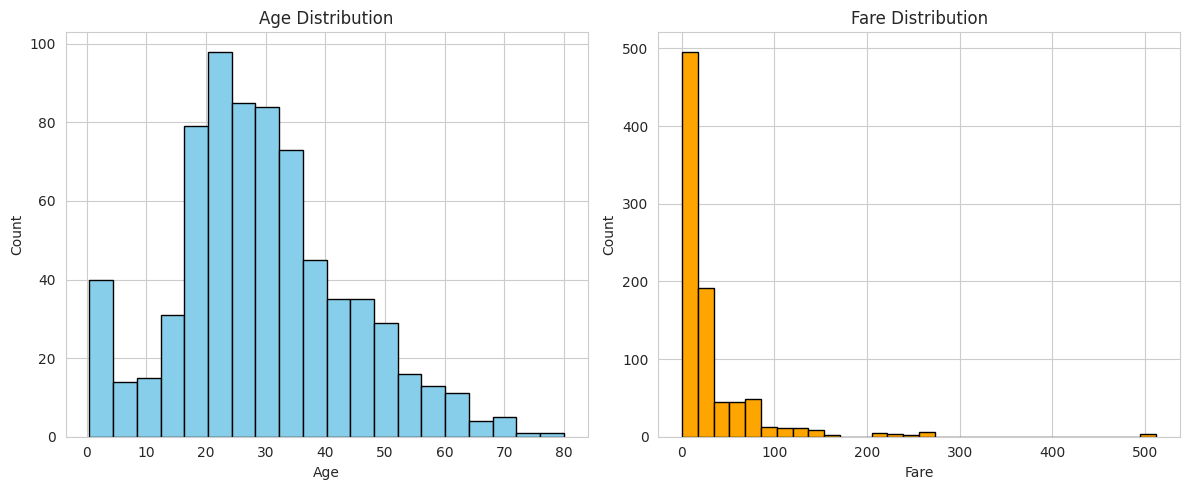

/tmp/ipython-input-1411315787.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=train_vis, palette="Set2")


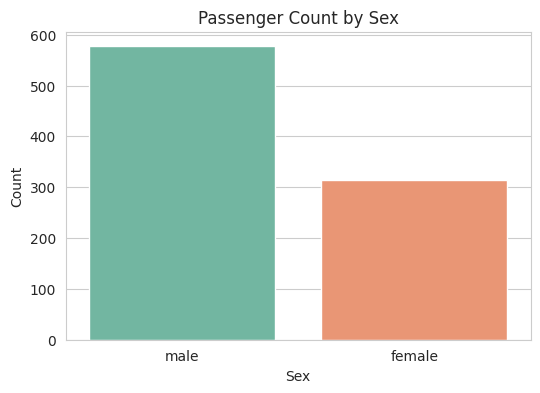

/tmp/ipython-input-1411315787.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=train_vis, palette="Set3")


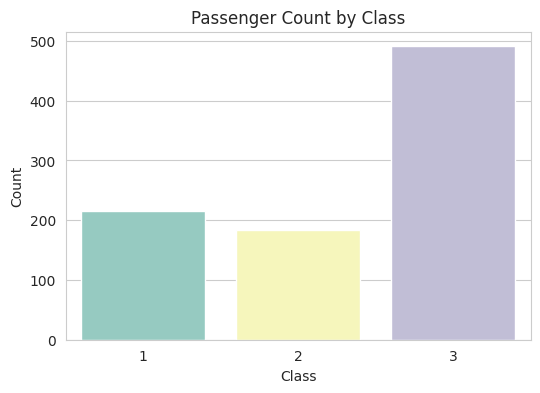

/tmp/ipython-input-1411315787.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Embarked", data=train_vis, palette="muted")


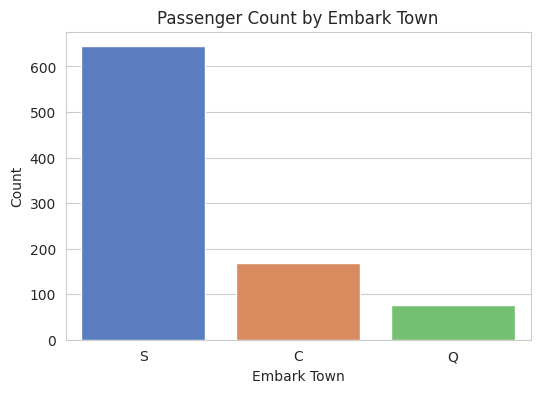

In [22]:
# 📌 Task 7: Exploratory Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Seaborn theme
sns.set_style("whitegrid")

# Use the original train.csv for visualization
train_vis = pd.read_csv("train.csv")

# ------------------------------
# 🔹 Step 7.1: Histograms for Numerical Features
# ------------------------------
plt.figure(figsize=(12,5))

# Age distribution
plt.subplot(1,2,1)
plt.hist(train_vis["Age"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

# Fare distribution
plt.subplot(1,2,2)
plt.hist(train_vis["Fare"], bins=30, color="orange", edgecolor="black")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution")

plt.tight_layout()
plt.show()

# ------------------------------
# 🔹 Step 7.2: Bar Plots for Categorical Features
# ------------------------------

# Sex
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", data=train_vis, palette="Set2")
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Pclass (Passenger Class)
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", data=train_vis, palette="Set3")
plt.title("Passenger Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Embarked (Embark Town)
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", data=train_vis, palette="muted")
plt.title("Passenger Count by Embark Town")
plt.xlabel("Embark Town")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2983189265.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=train_vis, palette="Set1") # Use train_vis


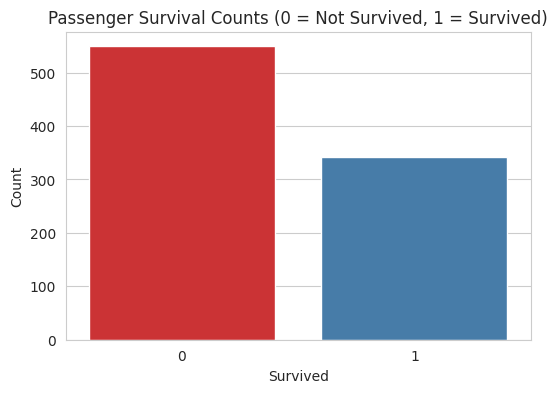

/tmp/ipython-input-2983189265.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=train_vis, palette="Set2") # Use train_vis


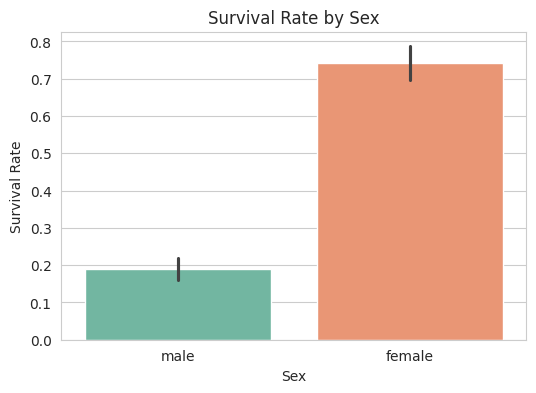

/tmp/ipython-input-2983189265.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train_vis, palette="Set3") # Use train_vis


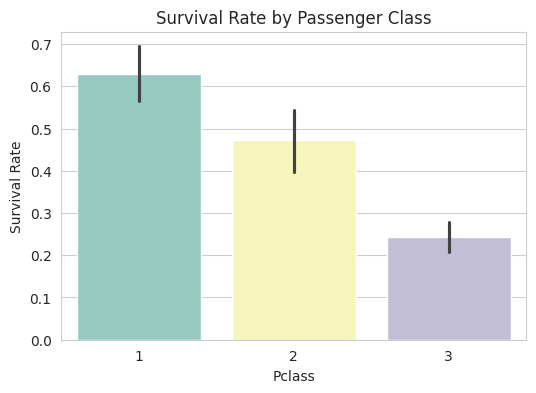

/tmp/ipython-input-2983189265.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=train_vis, palette="muted") # Use train_vis


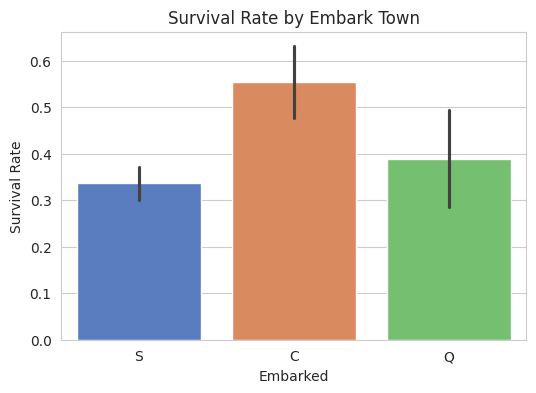

In [24]:
# 📌 Task 8: Survival Analysis Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

sns.set_style("whitegrid")

# Load original dataset
train_vis = pd.read_csv("train.csv")

# ------------------------------
# 🔹 Step 8.1: Bar plot - Survival Counts
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=train_vis, palette="Set1") # Use train_vis
plt.title("Passenger Survival Counts (0 = Not Survived, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# ------------------------------
# 🔹 Step 8.2: Survival Rate by Sex
# ------------------------------
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=train_vis, palette="Set2") # Use train_vis
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

# ------------------------------
# 🔹 Step 8.3: Survival Rate by Class
# ------------------------------
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=train_vis, palette="Set3") # Use train_vis
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# ------------------------------
# 🔹 Step 8.4: Survival Rate by Embark Town
# ------------------------------
plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", data=train_vis, palette="muted") # Use train_vis
plt.title("Survival Rate by Embark Town")
plt.ylabel("Survival Rate")
plt.show()

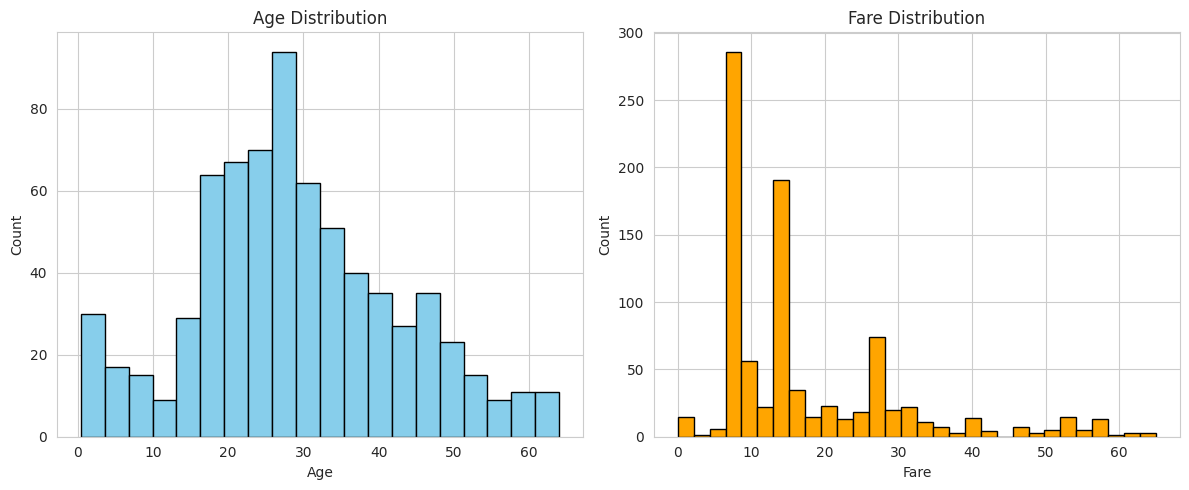

In [25]:
# 📌 Task 7.1: Histograms for Age and Fare

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Age distribution
plt.subplot(1,2,1)
plt.hist(train["Age"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

# Fare distribution
plt.subplot(1,2,2)
plt.hist(train["Fare"], bins=30, color="orange", edgecolor="black")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution")

plt.tight_layout()
plt.show()


/tmp/ipython-input-1575124070.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=train_vis, palette="Set2") # Use train_vis


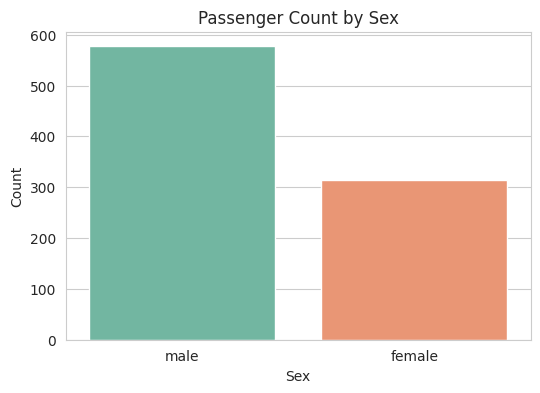

/tmp/ipython-input-1575124070.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=train_vis, palette="Set3") # Use train_vis


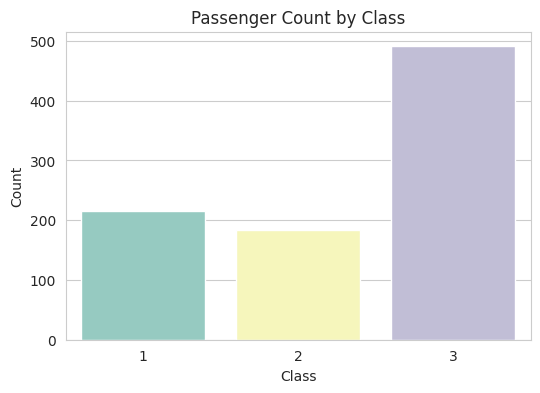

/tmp/ipython-input-1575124070.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Embarked", data=train_vis, palette="muted") # Use train_vis


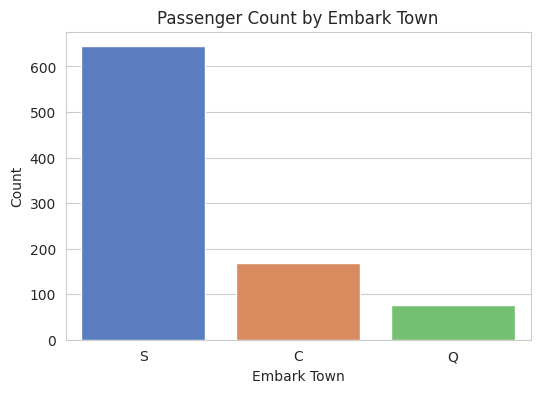

In [27]:
# 📌 Task 7.2: Bar plots for Sex, Class, and Embark_town

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Load the original train dataset for visualization
train_vis = pd.read_csv("train.csv")

# Sex
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", data=train_vis, palette="Set2") # Use train_vis
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", data=train_vis, palette="Set3") # Use train_vis
plt.title("Passenger Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Embark Town
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", data=train_vis, palette="muted") # Use train_vis
plt.title("Passenger Count by Embark Town")
plt.xlabel("Embark Town")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-989086915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=train_vis, palette="Set2")


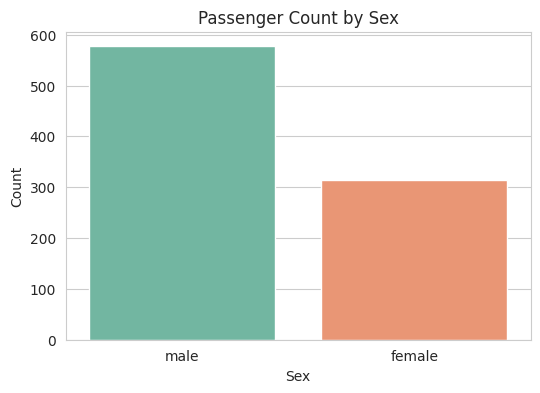

/tmp/ipython-input-989086915.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=train_vis, palette="Set3")


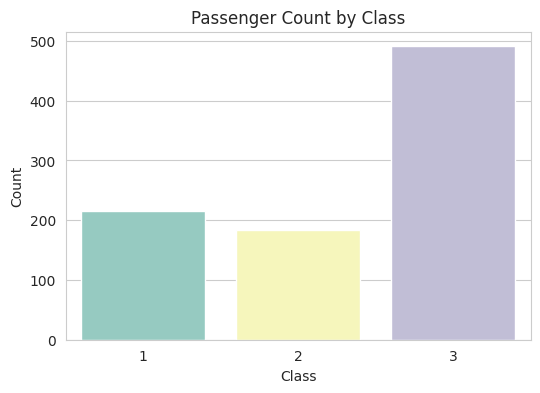

/tmp/ipython-input-989086915.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Embarked", data=train_vis, palette="muted")


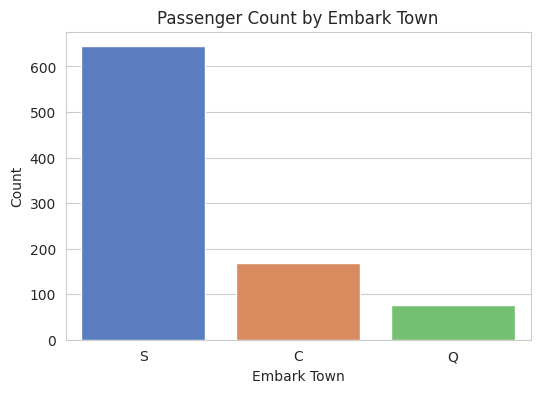

In [28]:
# 📌 Task 7.2: Bar plots for Sex, Class, and Embark_town

import seaborn as sns
import matplotlib.pyplot as plt

# Use the original train.csv for visualization
train_vis = pd.read_csv("train.csv")

# ------------------------------
# 🔹 Passenger Count by Sex
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", data=train_vis, palette="Set2")
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# ------------------------------
# 🔹 Passenger Count by Class
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", data=train_vis, palette="Set3")
plt.title("Passenger Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# ------------------------------
# 🔹 Passenger Count by Embark Town
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", data=train_vis, palette="muted")
plt.title("Passenger Count by Embark Town")
plt.xlabel("Embark Town")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3596801218.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=train_vis, palette="Set1")


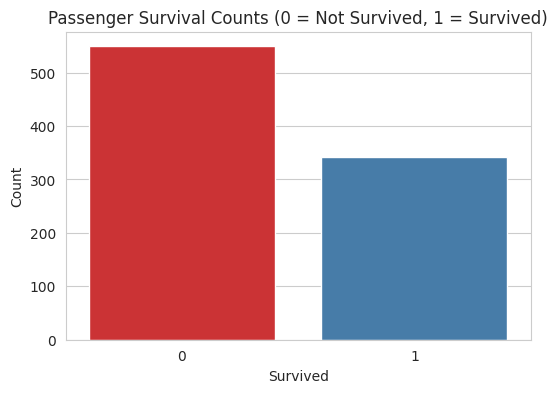

In [29]:
# 📌 Task 8.1: Bar plot of survived vs not survived

import seaborn as sns
import matplotlib.pyplot as plt

train_vis = pd.read_csv("train.csv")   # use original dataset

plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=train_vis, palette="Set1")
plt.title("Passenger Survival Counts (0 = Not Survived, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-714437607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=train_vis, palette="Set2")


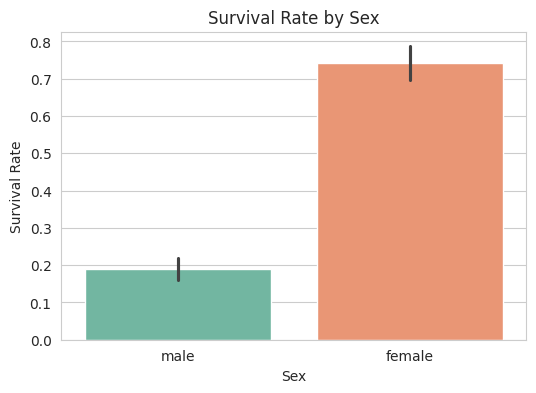

/tmp/ipython-input-714437607.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train_vis, palette="Set3")


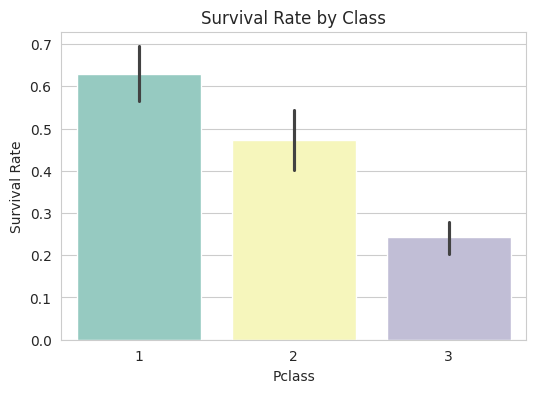

/tmp/ipython-input-714437607.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=train_vis, palette="muted")


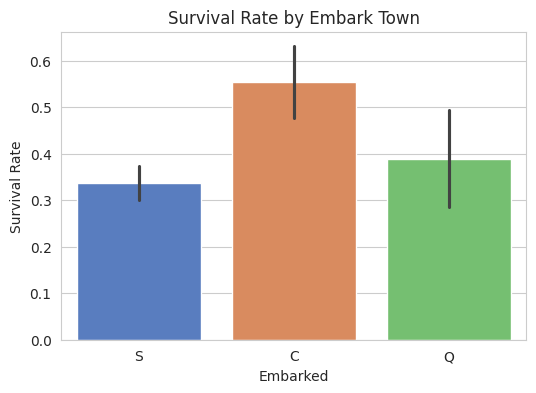

In [30]:
# 📌 Task 8.2: Survival rate by Sex, Class, and Embark Town

# Survival Rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=train_vis, palette="Set2")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

# Survival Rate by Class
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=train_vis, palette="Set3")
plt.title("Survival Rate by Class")
plt.ylabel("Survival Rate")
plt.show()

# Survival Rate by Embark Town
plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", data=train_vis, palette="muted")
plt.title("Survival Rate by Embark Town")
plt.ylabel("Survival Rate")
plt.show()


In [31]:
# 📌 Task 9.1: Calculate correlation matrix

import pandas as pd

train_vis = pd.read_csv("train.csv")   # use original dataset

# Select only numerical columns
numeric_cols = train_vis.select_dtypes(include=["int64", "float64"]).columns
print("Numerical columns:", numeric_cols.tolist())

# Calculate correlation matrix
corr_matrix = train_vis[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


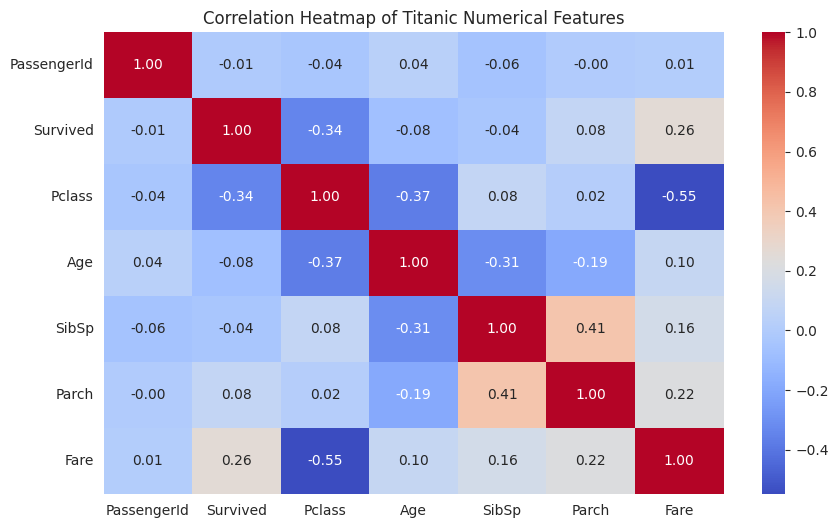

In [32]:
# 📌 Task 9.2: Display correlation heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Titanic Numerical Features")
plt.show()


/tmp/ipython-input-255026079.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=train_vis, palette="Set2")


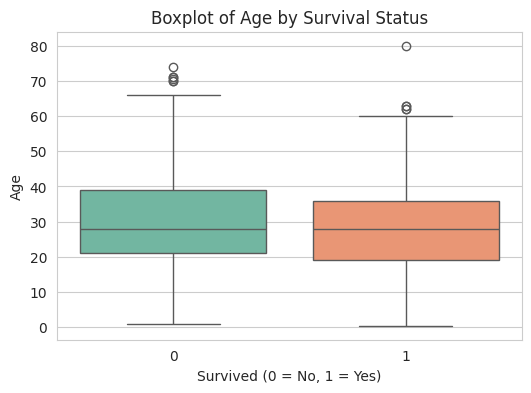

In [33]:
# 📌 Task 10.1: Boxplot for Age grouped by Survival

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

train_vis = pd.read_csv("train.csv")

plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=train_vis, palette="Set2")
plt.title("Boxplot of Age by Survival Status")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


/tmp/ipython-input-3881040048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=train_vis, palette="Set3")


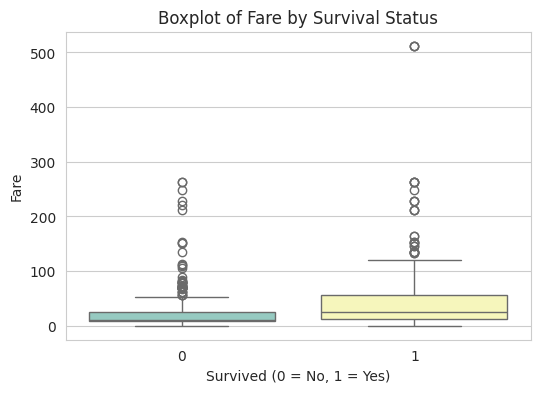

In [34]:
# 📌 Task 10.2: Boxplot for Fare grouped by Survival

plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Fare", data=train_vis, palette="Set3")
plt.title("Boxplot of Fare by Survival Status")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.show()


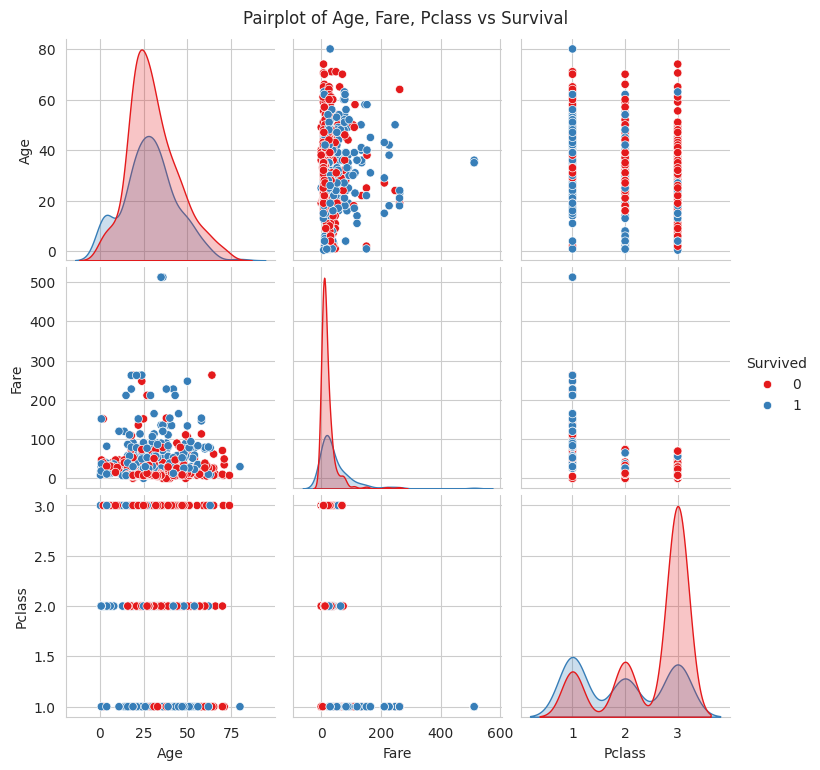

In [35]:
# 📌 Task 11: Pairplot for Age, Fare, Pclass, Survived

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load original dataset
train_vis = pd.read_csv("train.csv")

# Select relevant columns
features = ["Age", "Fare", "Pclass", "Survived"]

# Pairplot
sns.pairplot(train_vis[features], hue="Survived", palette="Set1")
plt.suptitle("Pairplot of Age, Fare, Pclass vs Survival", y=1.02)
plt.show()